<a href="https://colab.research.google.com/github/Vlad4441/Sigmoid-Exam/blob/main/Sigmoid_Exam_Vlad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hey ! Thank you for the journey, it was great! Only beggining tho :)

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
!pip install imperio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
!pip install kydavra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [324]:
#in order to run the notebook, upload the dataset to your google.drive and copy the path into the pd.read_csv()
path='/content/drive/MyDrive/Machine Learning/data3.csv'

In [325]:
df=pd.read_csv(path)

In [255]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [256]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

the dataset is imabalced having a 3:1 ratio of people earing less than 50k compare to people who earn above 50k

In [257]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Text(0.5, 1.0, 'Income column imbalance')

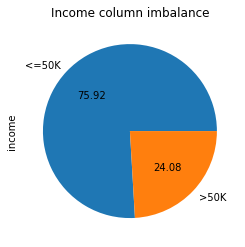

In [258]:
df['income'].value_counts().plot.pie(autopct='%.2f')
plt.title('Income column imbalance')

the dataset uses the '?' symbol to reprezent missing data, in order to process the data we will replace it with np.nan


In [259]:
df.replace('?', np.nan, inplace=True)

In [260]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In order to impute the missing categorical values, I am going to use Categorical Imputer which replaces the missing string with the most frequent unique value in the column.

In [261]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

# the following columns are categorical and have missing values
cols=['workclass', 'occupation', 'native.country']

for col in cols:
  df[col]=imputer.fit_transform(df[col])

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [262]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

checking and removing duplicates

In [263]:
df.duplicated().sum()

24

In [264]:
df.drop_duplicates(inplace=True)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


##Feature engineering & feature selection

To determine the way in which the categorical type columns will be transformed we need to analyze the number of unique instances whithin each column. If its = 2 then we will apply the Label encoder on that column, if > 2 the One Hot Encoder will be used.

In [266]:
dct=dict()
#we iterate through each non-numeric dtype column to calculate the number of unique values
for col in df.select_dtypes(['object']).columns:
  dct[col]=df[col].unique()

In [267]:
for key, value in dct.items():
  print(key, len(value))

workclass 8
education 16
marital.status 7
occupation 14
relationship 6
race 5
sex 2
native.country 41
income 2


In [268]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

We are going to frequency encode the native.country column which has 41 unique values, in order to avoid a sparse matrix

In [269]:
from imperio import FrequencyImputationTransformer
#FrequencyImputationTransformer is great but had an error and couldnt figure it out
#im going to encode it manualy

In [270]:
df['native.country'].value_counts().head()

United-States    29735
Mexico             639
Philippines        198
Germany            137
Canada             121
Name: native.country, dtype: int64

In [271]:
frequency_dict=df['native.country'].value_counts().to_dict()

In [272]:
df['native.country']=df['native.country'].map(frequency_dict)

since the education column has data which has a higherarchical relantionship we can label encode along with the other columns with 2 unique values

In [273]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [274]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

cols=['sex', 'income', 'education']
for col in cols:
  df[col]=label_en.fit_transform(df[col])


the rest of the categorical columns will be one hot encoded

In [275]:
cols=['workclass',  'marital.status', 'occupation', 'relationship', 'race'] 
df_one_hot_encoded=pd.get_dummies(df[cols])

In [276]:
df=pd.concat([df, df_one_hot_encoded], axis=1 )
df.drop(cols, axis=1, inplace=True)

In [277]:
df.shape

(32537, 50)

##Visualizing the data, against the target column

In [278]:
import seaborn as sns

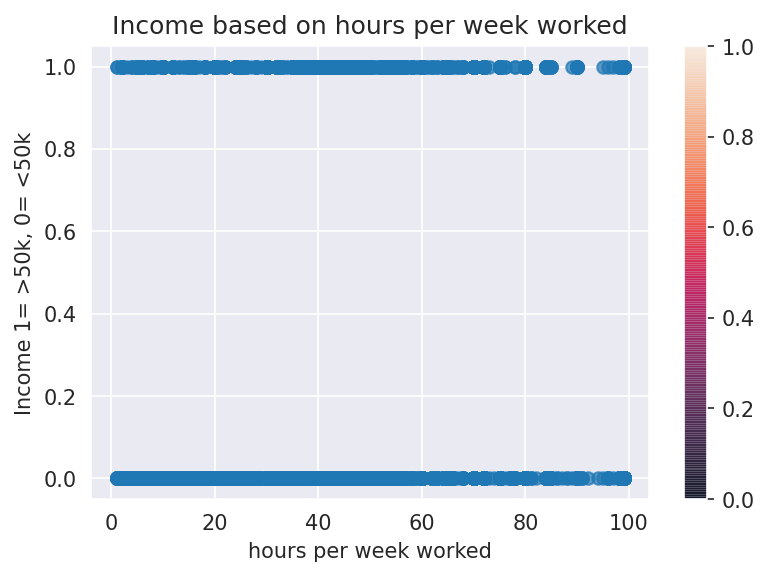

In [279]:
with sns.axes_style('darkgrid'):
  x=df['hours.per.week']
  y=df['income']
  # colors=df['education.num']
  plt.figure(dpi=150)
  plt.scatter(x, y, cmap='viridis', alpha=0.7)
  cb=plt.colorbar()
  plt.ylabel("Income 1= >50k, 0= <50k")
  plt.xlabel("hours per week worked")
  plt.title("Income based on hours per week worked")

Text(0.5, 1.0, 'Lmplot, visualizing the how age and financial weight influences the income')

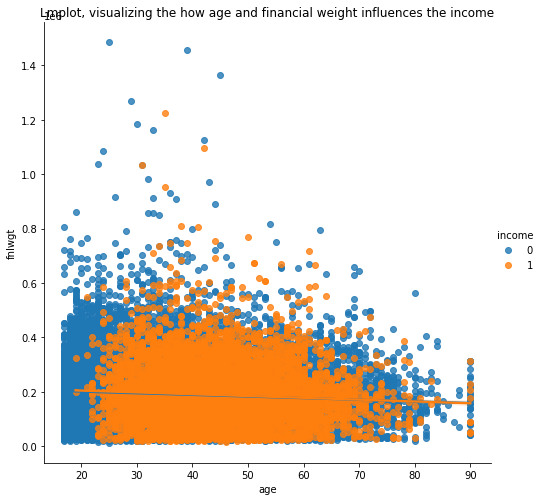

In [280]:
sns.lmplot(data=df, x='age', y='fnlwgt', hue='income', height=7, aspect=1)
plt.title("Lmplot, visualizing the how age and financial weight influences the income")

##Outlier Detection

In [281]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()

In [282]:
# Apply algorithm to data
df['outlier']=pd.Series(model.fit_predict(df.values))
# Remove rows where there is -1 in created column
df=df[df.outlier!=-1]


In [283]:
df.drop(['outlier'], axis=1, inplace=True)

We can notice that our method has dropped ~ 1000 rows which were outliers
(32537 row originally)

In [284]:
df.shape

(31769, 50)

#Feature selection

Im going to perform feature selection with the PValueSelector()

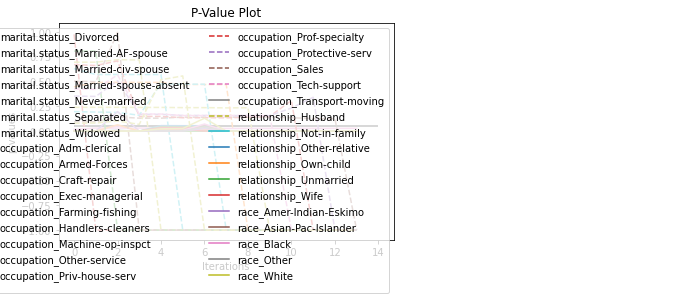

In [285]:
from kydavra import PValueSelector
pvalue_selector = PValueSelector()
selected_columns = pvalue_selector.select(df, 'income')
pvalue_selector.plot_process()

In [286]:
len(selected_columns)

36

In [287]:
df_selected=df[selected_columns]

Within the pipeline the selected columns data will be compared with the non selected columns data, thus determining if it is worth using feature_selection

In [288]:
X_train_s, X_test_s, y_train_s, y_test_s=train_test_split(df_selected, df['income'], test_size=0.2, random_state=18)


Analyzing the correlation of the dataset with the target column

In [289]:
print(df.drop(['income'], axis=1).corrwith(df['income']).sort_values().head(), '\n\n',
df.drop(['income'], axis=1).corrwith(df['income']).sort_values().tail())

marital.status_Never-married   -0.319234
relationship_Own-child         -0.227547
relationship_Not-in-family     -0.191387
occupation_Other-service       -0.156542
relationship_Unmarried         -0.146370
dtype: float64 

 hours.per.week                       0.230167
age                                  0.231218
education.num                        0.331713
relationship_Husband                 0.408333
marital.status_Married-civ-spouse    0.448856
dtype: float64


creating a dictionary with the top 20 absolute maximum correlations to the target

In [290]:
bottom10=df.drop(['income'], axis=1).corrwith(df['income']).sort_values()[:10].to_dict()
top10=df.drop(['income'], axis=1).corrwith(df['income']).sort_values()[-10:].to_dict()
max_abs_corr={**bottom10, **top10}

In [291]:
names=list(max_abs_corr.keys())
values=list(max_abs_corr.values())

Text(0.5, 0, 'Column name')

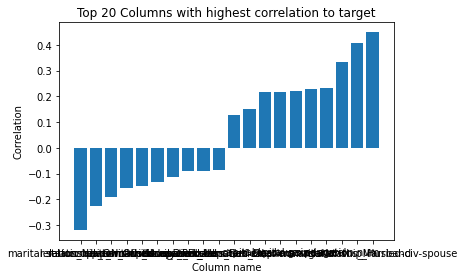

In [292]:
fig=plt.bar(names, values)
plt.title("Top 20 Columns with highest correlation to target")
plt.ylabel("Correlation")
plt.xlabel("Column name")

Shuffling the data before splitting it, to ensure unbiased metric outputs

In [293]:
df=df.sample(frac=1).reset_index(drop=True)
target=df['income']
X=df.drop(['income'], axis=1)

In [294]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, random_state=18)

##Class balancing

Class balancing, since the dataset is too large to perform class balancing methods such as ICOTE or SMOTEEN I will use over sampling / undersampling

In [295]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [296]:

# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [297]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [298]:
X_train.shape, y_train.shape

((25415, 49), (25415,))

In [299]:
X_over.shape, y_over.shape

((38808, 49), (38808,))

Im going to perform Both Undersampling and Oversampling to determine which performs better during cross validation

In [300]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [301]:
X_under.shape, y_under.shape

((12022, 49), (12022,))

##Building the pipeline

In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

Basic pipeline with the unbalanced data

In [303]:
p1=Pipeline([
              ("Std Scaler", StandardScaler()),
             ("Logistic Regression", LogisticRegression()),
             
             ])

In [304]:
p1.fit(X_train, y_train)
p1.score(X_test, y_test)

0.8500157381177211

In [305]:
p1.fit(X_over, y_over)
p1.score(X_test, y_test)

0.8103556814604973

In [306]:
p1.fit(X_under, y_under)
p1.score(X_test, y_test)

0.8092540132200189



---



Random forest classifier pipeline with unbalanced data


In [307]:
p2=Pipeline([
              ("Std Scaler", StandardScaler()),
             ("Random Forest", RandomForestClassifier()),
             
             ])

In [308]:
p2.fit(X_train, y_train)
p2.score(X_test, y_test)

0.8519043122442556

same pipeline with oversampling

In [309]:
p2.fit(X_over, y_over)
p2.score(X_test, y_test)

0.8448221592697513

same pipeline with undersampling

In [310]:
p2.fit(X_under, y_under)
p2.score(X_test, y_test)

0.8133459238275103

Since both of the pipelines have performed better with the non-balanced data we are going to use it.

---



Rdm forest pipeline with Min Max Scaler

In [311]:
p3=Pipeline([
              ("Min Max Scaler", MinMaxScaler() ),
              ("Std Scaler", StandardScaler()),
             ("Random Forest", RandomForestClassifier()),
             
             ])

In [312]:
p3.fit(X_train, y_train)
p3.score(X_test, y_test)

0.8506452628265659

XGBoost pipeline

---



In [313]:
p4=Pipeline([
              ("Std Scaler", StandardScaler()),
             ("XGBoost", xgb.XGBClassifier() ),
             
             ])

In [314]:
p4.fit(X_train, y_train)
p4.score(X_test, y_test)

0.8632357570034623

In [315]:
p4.fit(X_train_s, y_train_s)
p4.score(X_test_s, y_test_s)

0.8635505193578848

Since feature selection didnt improve the pipe score we will use the normal dataset

KNN pipeline

---



In [316]:
p5=Pipeline([
              ("Std Scaler", StandardScaler()),
             ("KNN", KNeighborsClassifier() ),
             
             ])

In [317]:
p5.fit(X_train, y_train)
p5.score(X_test, y_test)

0.8279823733081524



---


Based on anlyzing the performance of the pipelines we have determined that the XGBoost+StandardScaler()+non-balanced data has the highest score.




In [318]:
p4=Pipeline([
              ("Std Scaler", StandardScaler()),
             ("XGBoost", xgb.XGBClassifier() ),
             
             ])

In [319]:
p4.fit(X_train, y_train)
p4.score(X_test, y_test)

0.8632357570034623

To determine the overall performance of the model i will use cross validation

In [320]:
from sklearn.model_selection import cross_val_score
cross_val_score(p4, X, target, cv=5).mean()

0.8637981921948944

Plot the confusion matrix

In [321]:
y_preds=p4.predict(X_test)

In [322]:
from sklearn.metrics import plot_confusion_matrix

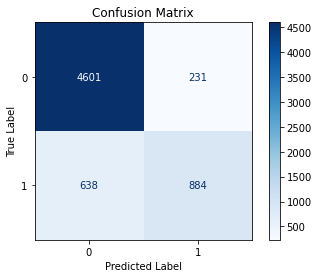

In [323]:
color = 'black'
matrix = plot_confusion_matrix(p4, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#Thank you
